In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
col_names = ['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 
'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?', 'Hour', 'Minute', 'Date', 'Day_of_Week']

df = pd.read_csv('df_EDA.csv/df_EDA.csv', delimiter='|', names=col_names, header=None)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          float64
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       int64  
 15  Hour            float64
 16  Minute          float64
 17  Date            object 
 18  Day_of_Week     object 
dtypes: float64(4), int64(8), object(7)
memory usage: 3.5+ GB


In [9]:
len(df)

24386900

In [10]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Minute,Date,Day_of_Week
0,0,0,2002,9,1,2024-06-07T06:21:00.000-04:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,0,6.0,21.0,2002-09-01,Sunday
1,0,0,2002,9,1,2024-06-07T06:42:00.000-04:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,0,6.0,42.0,2002-09-01,Sunday
2,0,0,2002,9,2,2024-06-07T06:22:00.000-04:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,0,6.0,22.0,2002-09-02,Monday
3,0,0,2002,9,2,2024-06-07T17:45:00.000-04:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,0,17.0,45.0,2002-09-02,Monday
4,0,0,2002,9,3,2024-06-07T06:23:00.000-04:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,0,6.0,23.0,2002-09-03,Tuesday


[Exploratory Data Analysis](#Exploratory-Data-Analysis)

- Exploratory Data Analysis showed that some variables have significant impact on the fraud rate such as time, amount and transaction method, so I incorporated them into the predictive models.<br>

- [Fraud Dataset](#Fraud-Dataset)
    - [Card Distribution](#Card-Distribution)

    - [Time Distribution](#Time-Distribution)<br>
    *Time Variation*: The distribution of fraud cases displays distinct time variations
        - [Year](#Year)
        - [Month](#Month)
        - [Day of Month](#Day-of-Month)
        - [Day of Week](#Day-of-Week)
        - [Hour](#Hour)

    - [Amount Distribution](#Amount-Distribution)
    
    - [Geographical Distribution](#Geographical-Distribution)
        - [State](#State)
        - [City](#City)

    - [Transaction Method](#Transaction-Method)<br>
    *Transaction Amount*: Fraud is predominantly observed in transactions of smaller values<br>

    - [Checking Outliers](#Checking-Outliers)

### Exploratory Data Analysis

In [11]:
len(df.User.unique())

2000

There are 2000 customers involved in these transactions.

#### Fraud Dataset

In [12]:
fraud_df = df[df['Is Fraud?'] == 1]
fraud_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Minute,Date,Day_of_Week
4099,0,0,2015,11,15,2024-06-07T12:55:00.000-04:00,287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,1,12.0,55.0,2015-11-15,Sunday
4100,0,0,2015,11,15,2024-06-07T13:19:00.000-04:00,2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,1,13.0,19.0,2015-11-15,Sunday
4101,0,0,2015,11,16,2024-06-07T09:41:00.000-04:00,50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,1,9.0,41.0,2015-11-16,Monday
4102,0,0,2015,11,16,2024-06-07T09:46:00.000-04:00,248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,1,9.0,46.0,2015-11-16,Monday
4103,0,0,2015,11,16,2024-06-07T11:20:00.000-04:00,473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,1,11.0,20.0,2015-11-16,Monday


#### Card Distribution

Text(0.5, 0, 'Card')

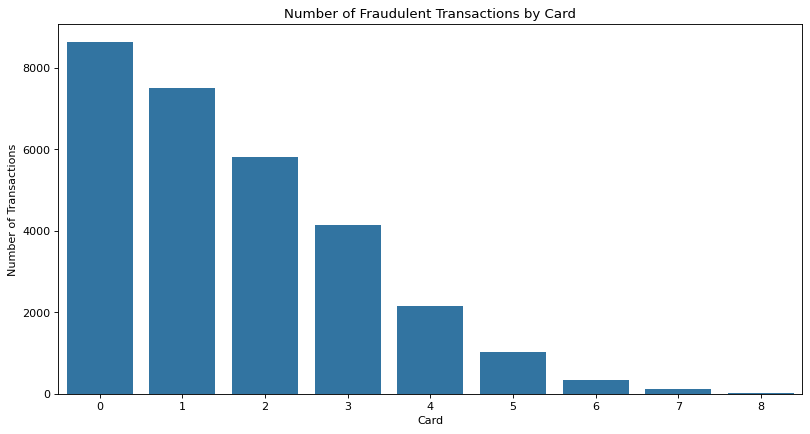

In [18]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Card')
plt.title('Number of Fraudulent Transactions by Card')
plt.ylabel('Number of Transactions')
plt.xlabel('Card')

The graph shows a significant concentration of fraudulent activity in card types 0, 1, and 2 with over 6000 transactions each. Hovewer, it indicates a clear trend of decreasing fraudulent activity as the card type number increases.

#### Time Distribution

##### Year

Text(0.5, 0, 'Year')

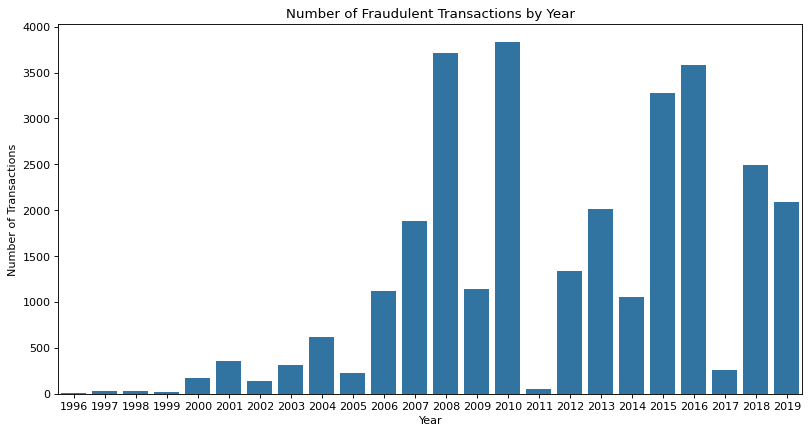

In [19]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Year')
plt.title('Number of Fraudulent Transactions by Year')
plt.ylabel('Number of Transactions')
plt.xlabel('Year')

As shown in the graph, fraud cases have been rising each year, with a notable spike occurring during the Great Recession in 2008.

##### Month

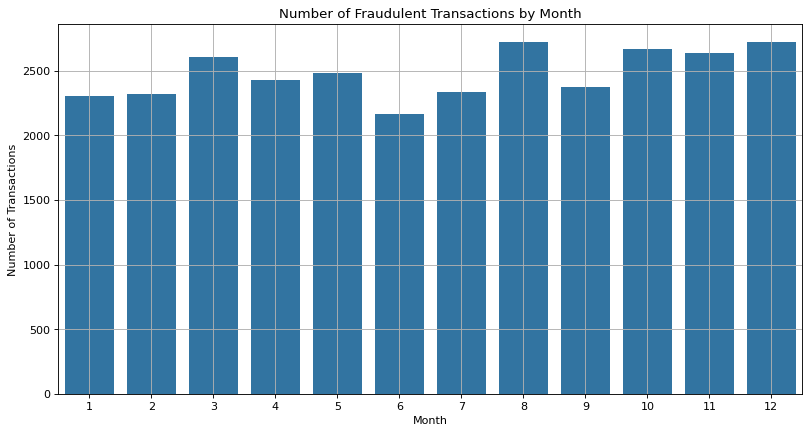

In [20]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Month')
plt.title('Number of Fraudulent Transactions by Month')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.grid(True)

The graph shows no major fluctuations, though there is a slight rise in fraud cases towards the end of the year.

##### Day Of Month

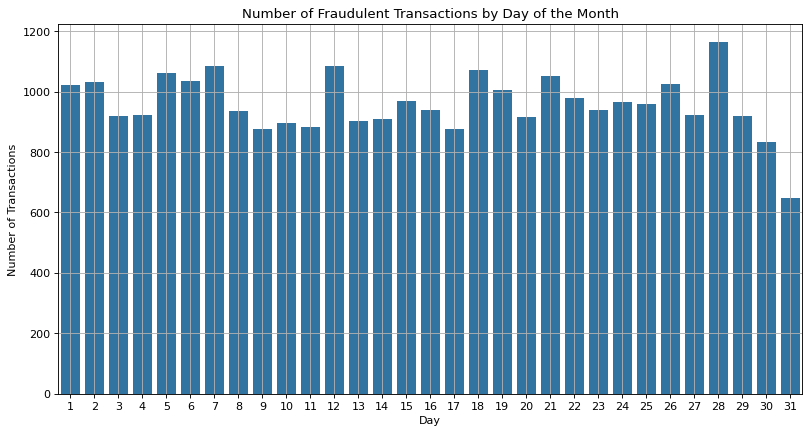

In [24]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Day')
plt.title('Number of Fraudulent Transactions by Day of the Month')
plt.ylabel('Number of Transactions')
plt.xlabel('Day')
plt.grid(True)

Fraud cases remain fairly steady throughout the month, with a sudden spike on day 28 followed by a slight decline towards the month's end.

##### Day of Week

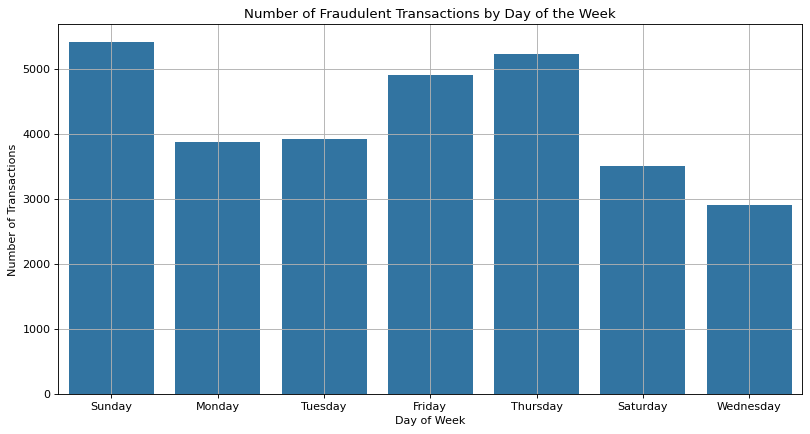

In [25]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Day_of_Week')
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.ylabel('Number of Transactions')
plt.xlabel('Day of Week')
plt.grid(True)

##### Hour

Text(0.5, 0, 'Hour')

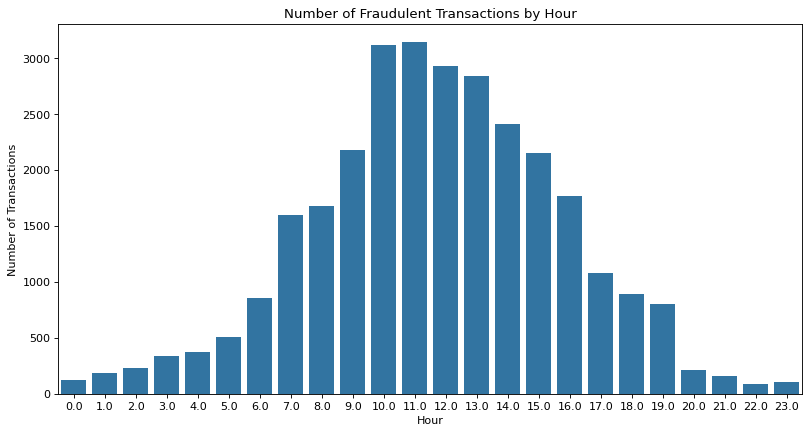

In [26]:
plt.figure(figsize=(12,6), dpi=80)
sns.countplot(data=fraud_df, x='Hour', order=sorted(fraud_df['Hour'].unique()))
plt.title('Number of Fraudulent Transactions by Hour')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')

The majority of fraud cases happen between 10 a.m. and 1 p.m. local time.

#### Amount Distribution

(-300.0, 1000.0)

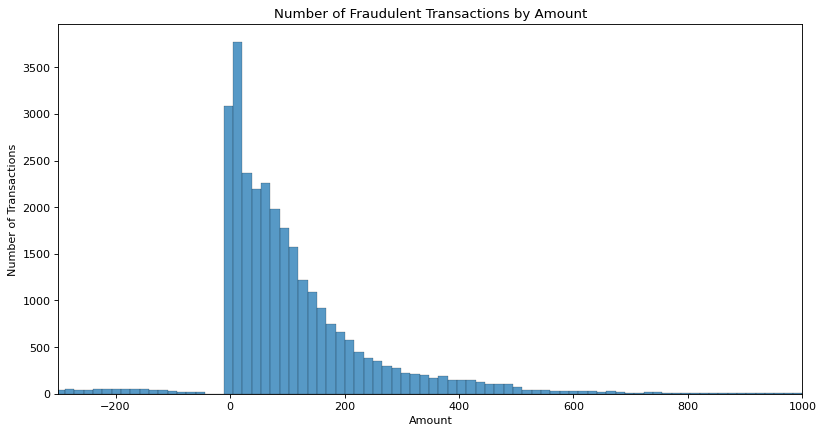

In [28]:
plt.figure(figsize=(12,6), dpi=80)
sns.histplot(fraud_df['Amount'], kde=False, bins=380)
plt.title('Number of Fraudulent Transactions by Amount')
plt.ylabel('Number of Transactions')
plt.xlabel('Amount')
plt.xlim(-300, 1000)

Fraud cases primarily fall between 0 and 250, suggesting a higher occurrence of fraud in lower-value transactions.

#### Geographical Distribution

##### State

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'Italy'),
  Text(1, 0, 'OH'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'Algeria'),
  Text(4, 0, 'Haiti'),
  Text(5, 0, 'FL'),
  Text(6, 0, 'TX'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'NY'),
  Text(10, 0, 'NJ'),
  Text(11, 0, 'MI'),
  Text(12, 0, 'NC'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'IL'),
  Text(16, 0, 'TN'),
  Text(17, 0, 'WA'),
  Text(18, 0, 'IN'),
  Text(19, 0, 'VA'),
  Text(20, 0, 'GA'),
  Text(21, 0, 'MD'),
  Text(22, 0, 'IA'),
  Text(23, 0, 'MO'),
  Text(24, 0, 'OK'),
  Text(25, 0, 'SC'),
  Text(26, 0, 'Tuvalu'),
  Text(27, 0, 'MA'),
  Text(28, 0, 'MN'),
  Text(29, 0, 'AZ'),
 

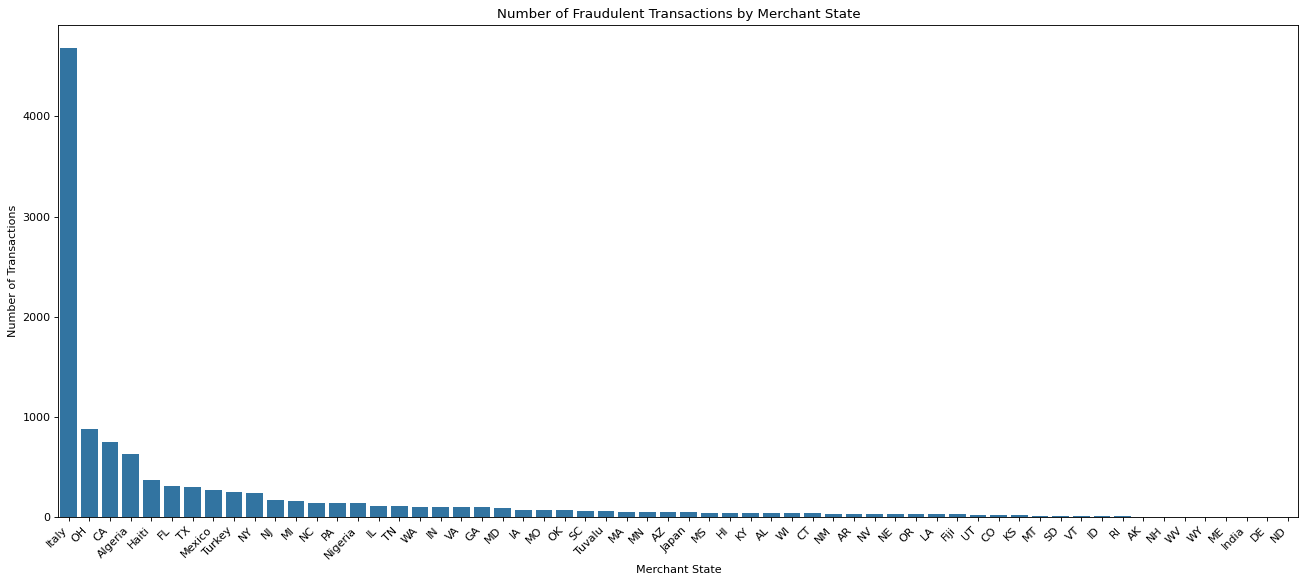

In [32]:
plt.figure(figsize=(20,8), dpi=80)
sns.countplot(data=fraud_df, x='Merchant State', order=fraud_df['Merchant State'].value_counts().index)
plt.title('Number of Fraudulent Transactions by Merchant State')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant State')
plt.xticks(rotation=45, ha='right')

##### City

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'ONLINE'),
  Text(1, 0, 'Rome'),
  Text(2, 0, 'Algiers'),
  Text(3, 0, 'Port au Prince'),
  Text(4, 0, 'Strasburg'),
  Text(5, 0, 'Mexico City'),
  Text(6, 0, 'Istanbul'),
  Text(7, 0, 'Abuja'),
  Text(8, 0, 'Berkeley'),
  Text(9, 0, 'Bellevue'),
  Text(10, 0, 'Funafuti'),
  Text(11, 0, 'Attica'),
  Text(12, 0, 'Oakland'),
  Text(13, 0, 'Tokyo'),
  Text(14, 0, 'Bucyrus'),
  Text(15, 0, 'Richmond'),
  Text(16, 0, 'Sugarcreek'),
  Text(17, 0, 'Los Angeles'),
  Text(18, 0, 'Suva'),
  Text(19, 0, 'Marion'),
  Text(20, 0, 'New York'),
  Text(21, 0, 'Las Vegas'),
  Text(22, 0, 'Fairfield'),
  Text(23, 0, 'Sacramento'),
  Text(24, 0, 'San Diego'),
  Text(25, 0, 'Castalia'),
  Text(26, 0, 'Miami'),
  Text(27, 0, 'Emeryville'),
  Text(28, 0, 'Saint Paul'),
  Text(29, 0, 'Loudonville')])

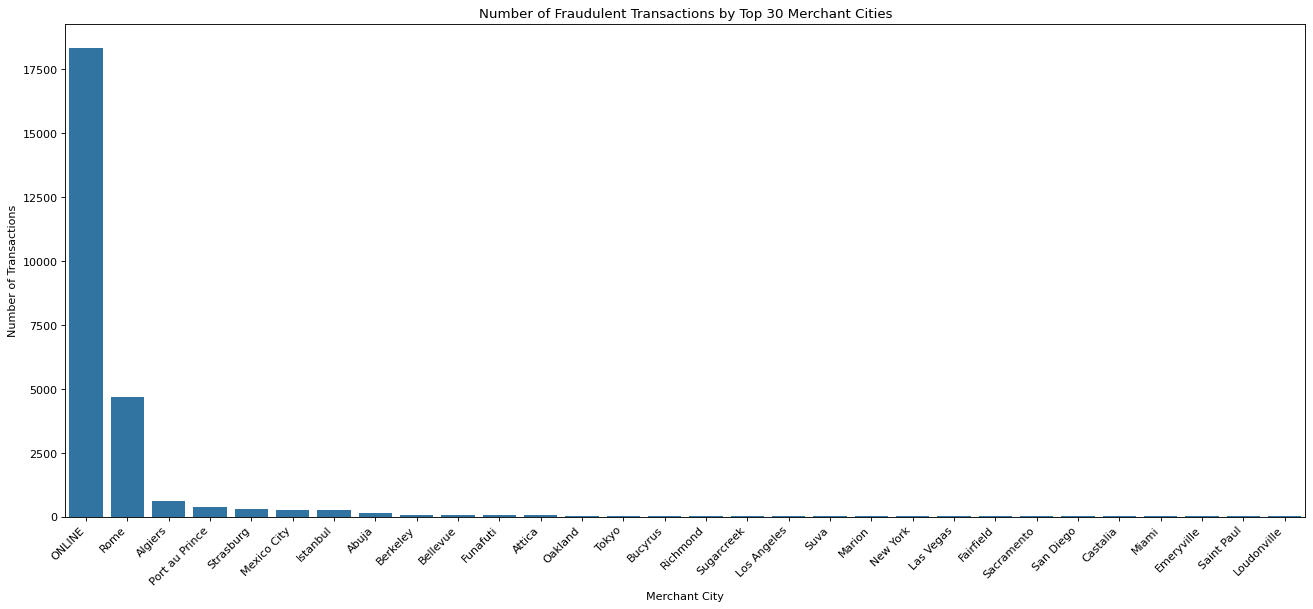

In [33]:
plt.figure(figsize=(20,8), dpi=80)
sns.countplot(data=fraud_df, x='Merchant City', order=fraud_df['Merchant City'].value_counts().head(30).index)
plt.title('Number of Fraudulent Transactions by Top 30 Merchant Cities')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant City')
plt.xticks(rotation=45, ha='right')

Most fraud cases predominantly occur in online transactions. In addition, cities like Rome, Algiers, and Port-au-Prince significantly stand out for frequent fraud activities.

#### Transaction Methods

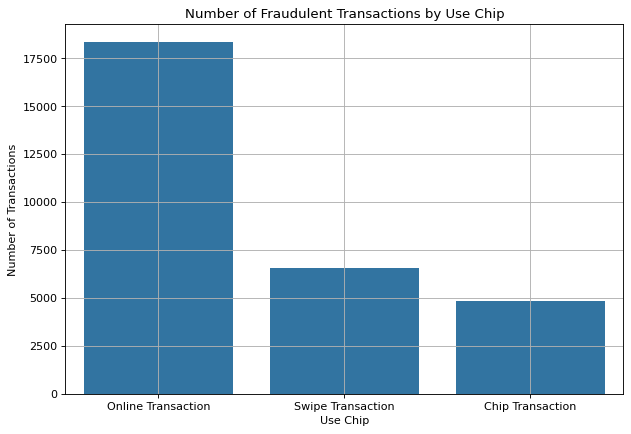

In [34]:
plt.figure(figsize=(9,6), dpi=80)
sns.countplot(data=fraud_df, x='Use Chip', order=fraud_df['Use Chip'].value_counts().index)
plt.title('Number of Fraudulent Transactions by Use Chip')
plt.ylabel('Number of Transactions')
plt.xlabel('Use Chip')
plt.grid(True)

Online transactions are at a higher risk of being fraudulent.

#### Checking Outliers

Text(0.5, 1.0, 'Transaction Amounts')

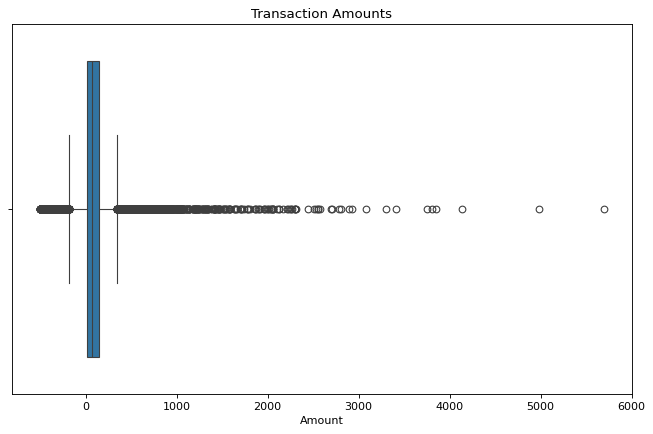

In [35]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x=fraud_df['Amount'])
plt.title('Transaction Amounts', fontsize=12)

In [36]:
per_25 = fraud_df['Amount'].quantile(0.25)
print(f"per_25: {per_25}")

per_75 = fraud_df['Amount'].quantile(0.75)
print(f"per_75: {per_75}")

# Compute the interquartile range in `Amount`
iqr = per_75 - per_25
print(f"iqr: {iqr}")

# Define the upper limit and lower limit for non-outlier values in `Amount`
upper_limit = per_75 + 1.5 * iqr
lower_limit = per_25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `Amount`
outliers = fraud_df[(fraud_df['Amount'] > upper_limit) | (fraud_df['Amount'] < lower_limit)]

# Count how many rows in the data contain outliers in `Amount`
print("Number of rows in the data containing outliers in `Amount`:", len(outliers))

per_25: 18.36
per_75: 150.13
iqr: 131.76999999999998
Lower limit: -179.29499999999996
Upper limit: 347.78499999999997
Number of rows in the data containing outliers in `Amount`: 2851


The box plot reveals that most transaction amounts are concentrated at the lower end and appear right-skewed, with 25% of transactions under 18.36 and 75% under 150.13, resulting in an interquartile range of 131.77; the lower and upper outlier limits are -179.29 and 347.78, respectively, and among the fraudulent transactions, 2851 are identified as outliers, reaching amounts up to about 6000.